<a href="https://colab.research.google.com/github/PillB/CoderhouseDL3/blob/main/ProjectoFinal%2BIllescas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de NLP - Proyecto Guttenberg

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Descargar el texto de "Pride and Prejudice" desde Project Gutenberg
url = 'https://www.gutenberg.org/files/1342/1342-0.txt'
response = requests.get(url)
text_data = response.content.decode('utf-8')#response.text

# Convertir el texto en una lista de líneas para formar un dataframe
lines = text_data.split('\n')
df = pd.DataFrame(lines, columns=['text'])

# 1. Tokenización
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

# 2. Eliminación de Stopwords
stop_words = set(stopwords.words('english'))
df['tokens_sin_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# 3. Lematización
lemmatizer = WordNetLemmatizer()
df['lemmas'] = df['tokens_sin_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# 4. Análisis de Sentimientos
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Análisis de frecuencia de palabras principales
# Concatenamos todas las listas de lemmas para hacer un conteo total
all_lemmas = [lemma for sublist in df['lemmas'] for lemma in sublist]
frequency_counts = Counter(all_lemmas)

# Mostramos las 20 palabras más comunes
most_common_words = frequency_counts.most_common(20)
print("Palabras más comunes:")
print(most_common_words)

print("Encontramos characteres de puntuacion que deben retirarse para enfocarnos en las palabras.")

Palabras más comunes:
[(',', 9850), ('.', 5291), ('“', 1919), ('”', 1887), (';', 1704), ('’', 761), ('mr.', 727), ('elizabeth', 644), ('could', 530), ('--', 498), ('would', 482), ('?', 479), ('darcy', 429), ('!', 425), ('said', 406), ('bennet', 348), ('much', 334), ('mrs.', 315), ('miss', 315), ('must', 311)]
Encontramos characteres de puntuacion que deben retirarse para enfocarnos en las palabras.


In [ ]:
df['lemmas'] = df['lemmas'].apply(lambda lemmas: [re.sub(r'[^\w\s]', '', lemma) for lemma in lemmas])
all_lemmas = [lemma for sublist in df['lemmas'] for lemma in sublist]
all_lemmas = [x for x in all_lemmas if len(x)>1]
frequency_counts = Counter(all_lemmas)

# Mostramos las 20 palabras más comunes
most_common_words = frequency_counts.most_common(20)
print("Palabras más comunes:")
print(most_common_words)

Palabras más comunes:
[('mr', 845), ('elizabeth', 644), ('could', 530), ('would', 482), ('darcy', 430), ('said', 406), ('bennet', 349), ('much', 335), ('mrs', 315), ('miss', 315), ('must', 312), ('bingley', 310), ('jane', 302), ('one', 293), ('sister', 291), ('lady', 281), ('know', 251), ('though', 238), ('never', 228), ('think', 226)]


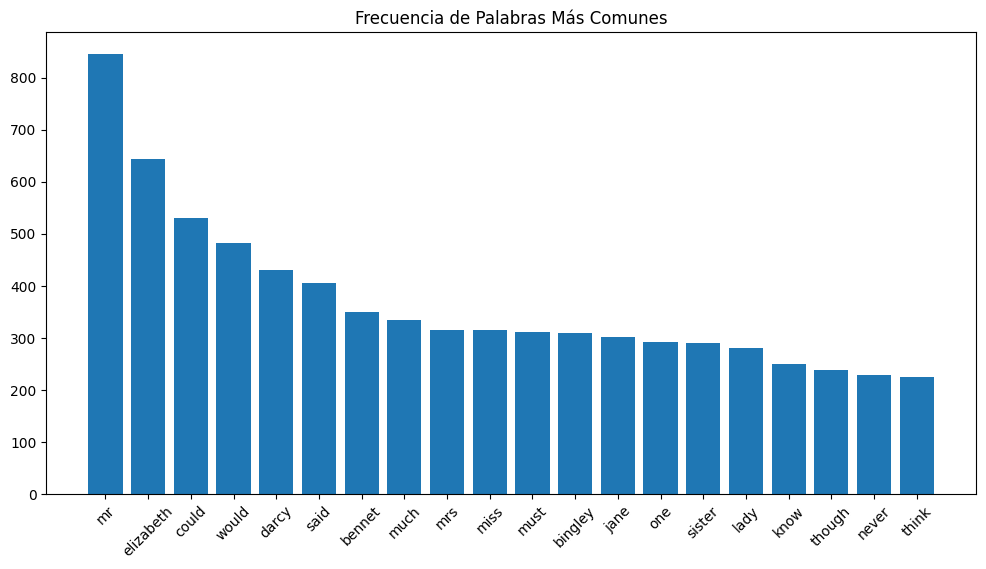

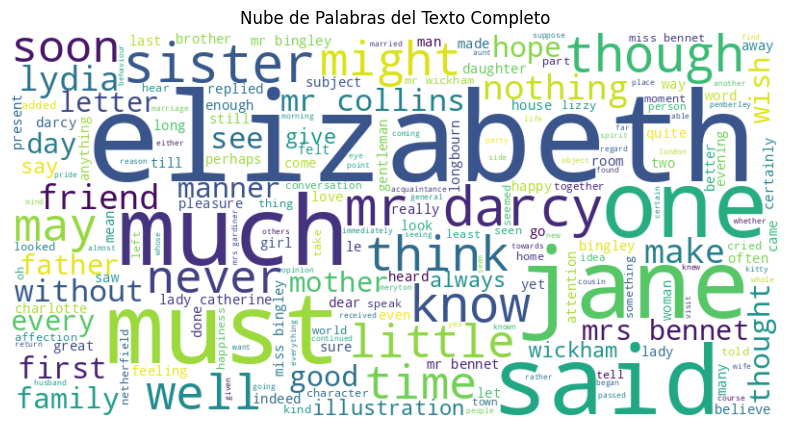

In [ ]:
# Graficar histograma de palabras más frecuentes
plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_words))
plt.title('Frecuencia de Palabras Más Comunes')
plt.xticks(rotation=45)
plt.show()

# Generar una nube de palabras para visualizar la frecuencia
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_lemmas))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras del Texto Completo')
plt.show()


In [ ]:
nltk.download('averaged_perceptron_tagger')
# Análisis de co-ocurrencia de nombres propios (diálogos y escenas compartidas)
# Usamos regex para extraer nombres propios, que usualmente están capitalizados.
proper_nouns = []
for sentence in df['text']:
    tokens = nltk.pos_tag(word_tokenize(sentence))
    proper_nouns += [word for word, pos in tokens if pos == 'NNP' and len(word)>3 and word not in  ['Mrs.','Miss'] and '_' not in word]

# Contar las co-ocurrencias de nombres propios
proper_noun_counts = Counter(proper_nouns)
common_proper_nouns = proper_noun_counts.most_common(10)
print("Nombres propios más comunes:")
print(common_proper_nouns)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Nombres propios más comunes:
[('Elizabeth', 629), ('Darcy', 427), ('Bennet', 337), ('Bingley', 309), ('Jane', 291), ('Wickham', 198), ('Lydia', 175), ('Collins', 173), ('Catherine', 130), ('Lizzy', 95)]


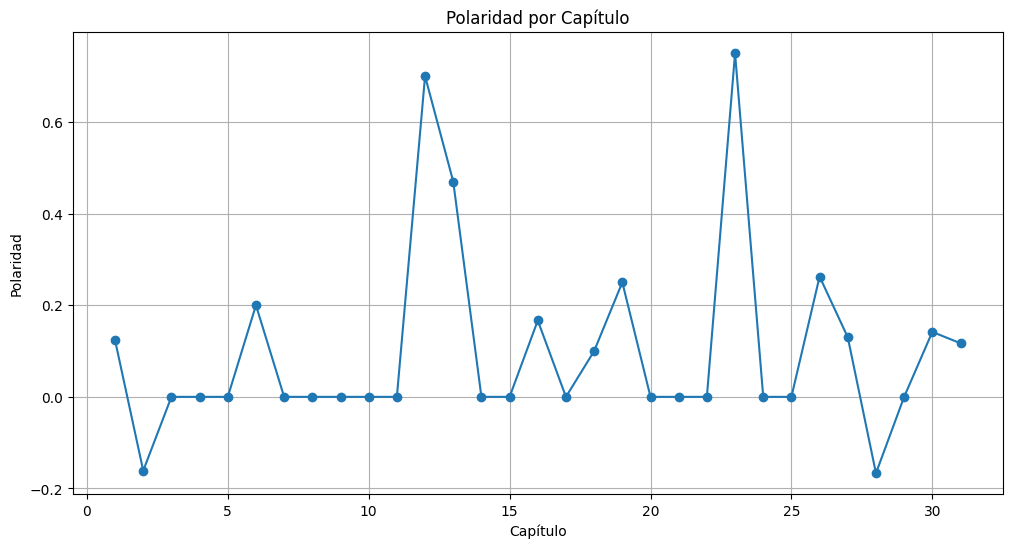

In [ ]:
# Análisis de polaridad por capítulo
# Dividimos el texto en capítulos según las apariciones de "Chapter"
chapters = text_data.split('Chapter')
chapter_polarities = [TextBlob(chapter).sentiment.polarity for chapter in chapters if chapter.strip() != '']
chapter_numbers = list(range(1, len(chapter_polarities) + 1))

# Graficar polaridad por capítulo
plt.figure(figsize=(12, 6))
plt.plot(chapter_numbers, chapter_polarities, marker='o')
plt.title('Polaridad por Capítulo')
plt.xlabel('Capítulo')
plt.ylabel('Polaridad')
plt.grid(True)
plt.show()

In [ ]:
expl = ''' Resumen de los análisis:
 1. Frecuencia de Palabras: Nos ayuda a identificar las palabras más repetidas, destacando temas recurrentes.
 2. Nube de Palabras: Visualización atractiva que resalta la prominencia de palabras.
 3. Co-ocurrencia de Nombres Propios: Identifica personajes que comparten escenas o diálogos.
 4. Polaridad por Capítulo: Permite ver cómo varía el tono emocional a lo largo del libro, capítulo por capítulo.
 Podemos intuir que pueden haber dos momentos cruciales de climax narrativo al final de la primera mitad del libro
 y al medio de la segunda mitad del libro
'''
print(expl)

 Resumen de los análisis:
 1. Frecuencia de Palabras: Nos ayuda a identificar las palabras más repetidas, destacando temas recurrentes.
 2. Nube de Palabras: Visualización atractiva que resalta la prominencia de palabras.
 3. Co-ocurrencia de Nombres Propios: Identifica personajes que comparten escenas o diálogos.
 4. Polaridad por Capítulo: Permite ver cómo varía el tono emocional a lo largo del libro, capítulo por capítulo. 
 Podemos intuir que pueden haber dos momentos cruciales de climax narrativo al final de la primera mitad del libro 
 y al medio de la segunda mitad del libro



Modelo de redes neuronales

In [54]:
# Importar librerías necesarias para el modelado de redes neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Cargar y preparar el dataset MNIST
# Este conjunto de datos contiene imágenes de dígitos escritos a mano de 0 a 9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los valores de píxeles entre 0 y 1

# Mostrar las dimensiones de los conjuntos de datos
print(f"Dimensiones del conjunto de entrenamiento: {x_train.shape}")
print(f"Dimensiones del conjunto de prueba: {x_test.shape}")

Dimensiones del conjunto de entrenamiento: (60000, 28, 28)
Dimensiones del conjunto de prueba: (10000, 28, 28)


In [56]:
# Mostrar la distribución de etiquetas en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
print(f"Distribución de etiquetas en el conjunto de entrenamiento: {dict(zip(unique, counts))}")

Distribución de etiquetas en el conjunto de entrenamiento: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


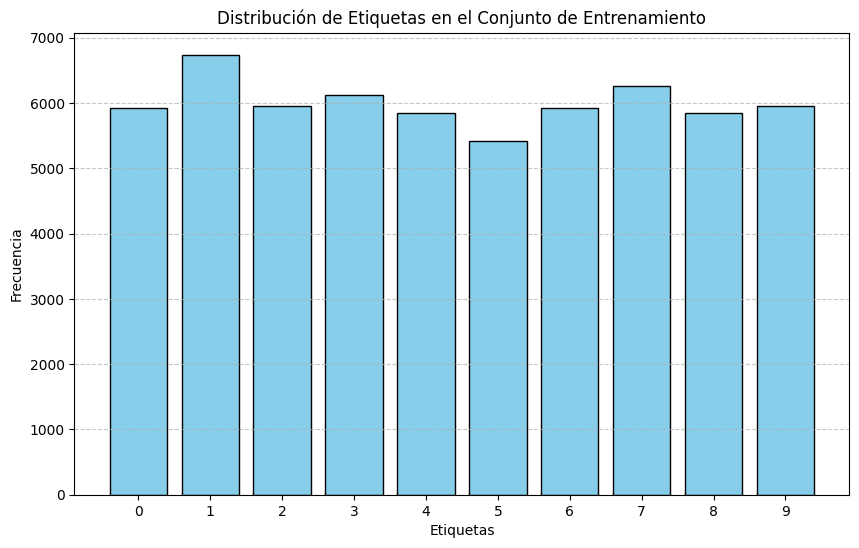

In [57]:
# Crear un histograma para visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Etiquetas en el Conjunto de Entrenamiento')
plt.xticks(unique)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

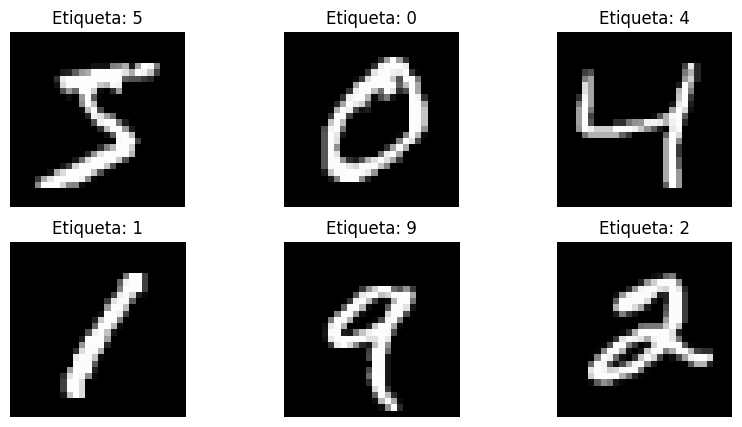

In [58]:
# Visualización exploratoria de algunas imágenes
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

In [59]:
# Construir y compilar un modelo de red neuronal con mas capas (en base al libro de GAN de Orreily)
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout para evitar el sobreajuste

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Aplanar y conectar con capas densas
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout adicional para mayor regularización

    # Capa de salida para la clasificación
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [60]:
# Entrenar el modelo en los datos de entrenamiento
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.8814 - loss: 0.3937 - val_accuracy: 0.9806 - val_loss: 0.0628
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.9708 - loss: 0.0916 - val_accuracy: 0.9833 - val_loss: 0.0537
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.9773 - loss: 0.0711 - val_accuracy: 0.9872 - val_loss: 0.0425
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 135s 51ms/step - accuracy: 0.9808 - loss: 0.0606 - val_accuracy: 0.9895 - val_loss: 0.0365
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 51ms/step - accuracy: 0.9820 - loss: 0.0586 - val_accuracy: 0.9910 - val_loss: 0.0298
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9840 - loss: 0.0518 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9854 - loss: 0.0448 - val_accuracy: 0.9908 - val_loss: 0.0314
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy:

In [62]:
# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en los datos de prueba: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9938 - loss: 0.0295
Precisión en los datos de prueba: 0.9945


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9938 - loss: 0.0295
Precisión en los datos de prueba: 0.9945


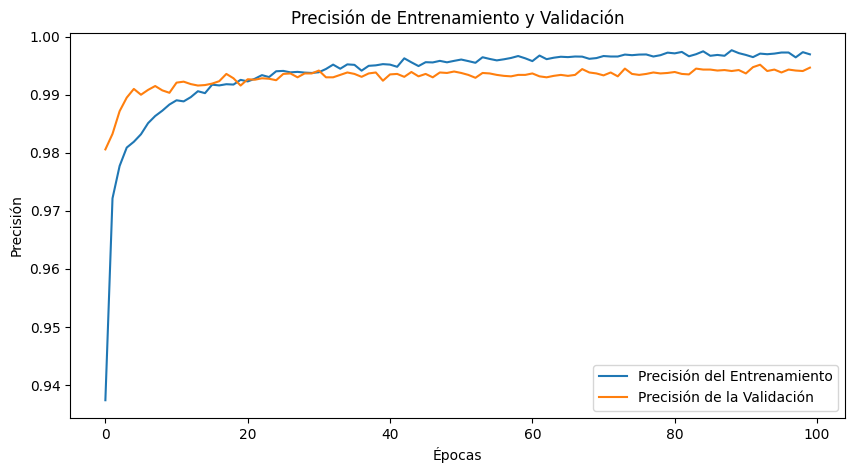

In [61]:

# Graficar la precisión del entrenamiento y la validación
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Precisión del Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de la Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión de Entrenamiento y Validación')
plt.legend()
plt.show()

# Análisis:
# - Las precisiones de entrenamiento y validación muestran el proceso de aprendizaje.
# - La precisión en el conjunto de prueba proporciona una medida de la capacidad de generalización del modelo.

# Conclusiones
# - El modelo actual proporciona una línea base con precisión aceptable.
# - Las mejoras futuras pueden incluir agregar capas convolucionales o ajustar hiperparámetros.
